In [1]:
!nvidia-smi


Tue Mar 11 18:06:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-c

In [3]:
!pip install ultralytics opencv-python numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.9/932.9 kB 28.2 MB/s eta 0:00:00


In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.10 MiB | 14.65 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.


In [5]:
%cd yolov5
!pip install -r requirements.txt

/content/yolov5


In [6]:
import torch
print("Torch version:", torch.__version__)

import ultralytics
print("Ultralytics version:", ultralytics.__version__)

Torch version: 2.5.1+cu124
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics version: 8.3.88


In [7]:
import cv2
import torch
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [9]:
model = YOLO("yolov5s.pt")  # Use YOLOv5 small model (change if needed)

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 148MB/s]


In [10]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'


0: 448x640 33 cars, 4 trucks, 39.2ms
Speed: 27.1ms preprocess, 39.2ms inference, 329.3ms postprocess per image at shape (1, 3, 448, 640)


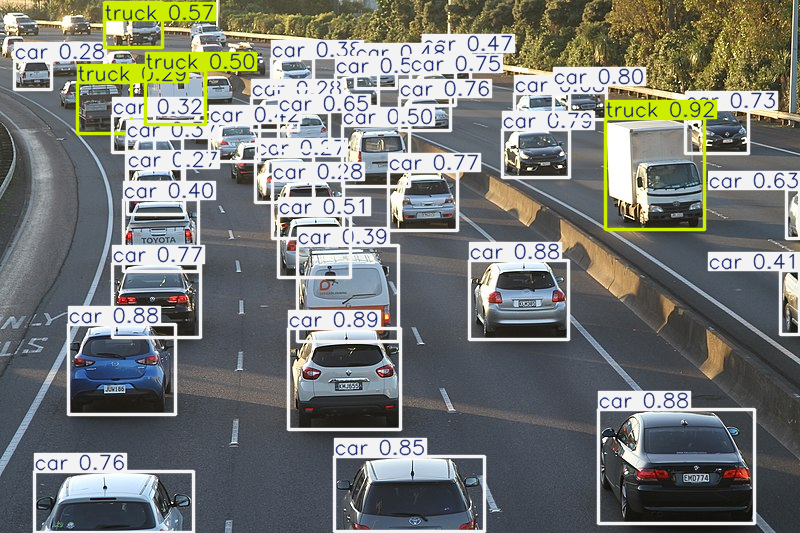

In [11]:
import cv2
import torch
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ✅ Load updated YOLO model
model = YOLO("yolov5su.pt")  # Updated model for better accuracy

# ✅ URL of the image
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg"

# ✅ Set User-Agent header to avoid 403 error
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

try:
    # ✅ Download and open the image using PIL
    response = requests.get(image_url, headers=headers, timeout=10)  # Added headers
    response.raise_for_status()  # Raise error for failed requests
    img = Image.open(BytesIO(response.content)).convert("RGB")  # Ensure correct format

    # ✅ Run YOLO model on the image
    results = model(img)

    # ✅ Display each result properly
    for result in results:
        result.show()  # Show the detection results

except requests.exceptions.RequestException as e:
    print(f"❌ Failed to download the image. Error: {e}")


In [12]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov5s.pt")

# Open webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO model on the frame
    results = model(frame)

    # Get the result image
    frame = results[0].plot()

    # Convert BGR to RGB for Matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame using Matplotlib
    plt.imshow(frame_rgb)
    plt.axis("off")  # Hide axes
    plt.show(block=False)
    plt.pause(0.01)  # Pause for streaming effect

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
# Remove cv2.destroyAllWindows() as it's not needed in Colab


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload a video file from your computer


Saving 1.mp4 to 1.mp4


In [ ]:
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # ✅ Use cv2_imshow for Colab

# ✅ Correct Paths (Files are in the main directory)
model_path = "/content/yolov5su.pt"  # Model outside 'yolov5' folder
video_path = "/content/1.mp4"   # Video outside 'yolov5' folder

# ✅ Load YOLO model
model = YOLO(model_path)

# ✅ Load video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit if video ends

    # ✅ Perform object detection
    results = model(frame)
    frame = results[0].plot()

    # ✅ Show the video frame with detections
    cv2_imshow(frame)

cap.release()  # ✅ Release the video capture
# ❌ Removed cv2.destroyAllWindows() (Not needed in Colab)


100%|██████████| 17.7M/17.7M [00:00<00:00, 148MB/s] 

Error: Could not open video.


Saving 1.0.jpg to 1.0.jpg

0: 448x640 1 person, 13.1ms
Speed: 4.3ms preprocess, 13.1ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


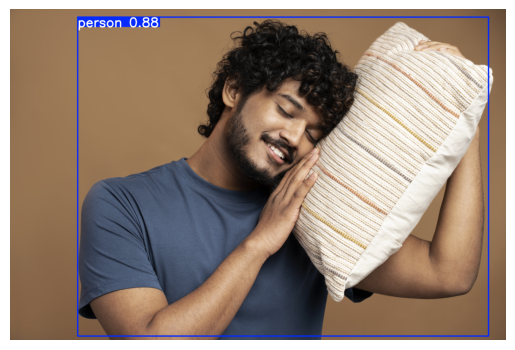

In [13]:
from google.colab import files
import cv2
import torch
import matplotlib.pyplot as plt

# ✅ Upload an image
uploaded = files.upload()

# ✅ Load image
image_path = list(uploaded.keys())[0]  # Get the uploaded filename
img = cv2.imread(image_path)

# ✅ Perform YOLOv5 detection
results = model(img)  # Get detection results

# ✅ Extract the image from results
frame = results[0].plot()  # Use .plot() instead of .render()

# ✅ Convert image format (for displaying in Colab)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.axis("off")  # Hide axis
plt.show()


Saving 2.0.jpg to 2.0.jpg

0: 640x448 1 person, 43.9ms
Speed: 4.1ms preprocess, 43.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


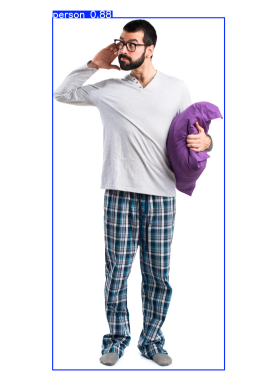

✅ The person is AWAKE!


In [14]:
from google.colab import files
import cv2
import torch
import matplotlib.pyplot as plt

# ✅ Upload an image
uploaded = files.upload()

# ✅ Load the uploaded image
image_path = list(uploaded.keys())[0]  # Get the uploaded filename
img = cv2.imread(image_path)

# ✅ Perform YOLOv5 detection
results = model(img)  # Get detection results

# ✅ Extract the image from results
frame = results[0].plot()  # Use .plot() instead of .render()

# ✅ Convert image format (for displaying in Colab)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# ✅ Save the processed image to Colab storage
output_image_path = "/content/processed_image.jpg"
cv2.imwrite(output_image_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

# ✅ Display the image
plt.imshow(frame)
plt.axis("off")  # Hide axis
plt.show()

# ✅ Identify if the person is "Awake" or "Sleepy"
predicted_classes = [result.names[int(cls)] for cls in results[0].boxes.cls]  # Extract detected classes

if "sleepy" in predicted_classes:
    print("🚨 The person is SLEEPY! 🚨")
else:
    print("✅ The person is AWAKE!")


Saving 1.0.jpg to 1.0 (1).jpg

0: 448x640 1 person, 13.3ms
Speed: 5.3ms preprocess, 13.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


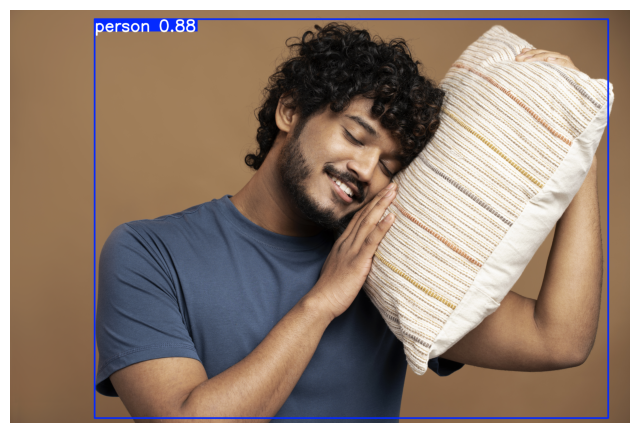

In [15]:
from google.colab import files
import cv2
import torch
import matplotlib.pyplot as plt

# ✅ Upload an image
uploaded = files.upload()

# ✅ Load the uploaded image
image_path = list(uploaded.keys())[0]  # Get the uploaded filename
img = cv2.imread(image_path)

# ✅ Perform YOLOv5 detection
results = model(img)  # Get detection results

# ✅ Extract detection results
frame = results[0].plot()  # Use .plot() instead of .render()

# ✅ Convert image format (for displaying in Colab)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# ✅ Save the processed image to Colab storage
output_image_path = "/content/processed_image.jpg"
cv2.imwrite(output_image_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

# ✅ Display the image
plt.figure(figsize=(8, 6))
plt.imshow(frame)
plt.axis("off")  # Hide axis
plt.show()

# ✅ Extract detected classes and confidence


Saving 2.0.jpg to 2.0 (1).jpg

0: 640x448 1 person, 13.0ms
Speed: 4.0ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


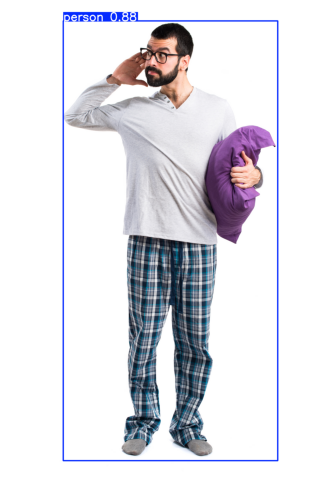

🧐 **Detection Results:**
✅ The person is AWAKE! (0.00% confidence)


In [16]:
from google.colab import files
import cv2
import torch
import matplotlib.pyplot as plt

# ✅ Upload an image
uploaded = files.upload()

# ✅ Load the uploaded image
image_path = list(uploaded.keys())[0]  # Get the uploaded filename
img = cv2.imread(image_path)

# ✅ Perform YOLOv5 detection
results = model(img)  # Get detection results

# ✅ Extract detection results
frame = results[0].plot()  # Use .plot() instead of .render()

# ✅ Convert image format (for displaying in Colab)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# ✅ Save the processed image to Colab storage
output_image_path = "/content/processed_image.jpg"
cv2.imwrite(output_image_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

# ✅ Display the image
plt.figure(figsize=(8, 6))
plt.imshow(frame)
plt.axis("off")  # Hide axis
plt.show()

# ✅ Extract detected classes and confidence scores
predictions = results[0].boxes  # Get bounding boxes
predicted_classes = [results[0].names[int(cls)] for cls in predictions.cls]  # Extract class names
confidences = predictions.conf.tolist()  # Confidence scores

# ✅ Check if the person is awake or sleepy
awake_confidence = 0
sleepy_confidence = 0

for i, obj in enumerate(predicted_classes):
    if obj == "awake":
        awake_confidence = confidences[i] * 100  # Convert to percentage
    elif obj == "sleepy":
        sleepy_confidence = confidences[i] * 100  # Convert to percentage

# ✅ Display probability results
print("🧐 **Detection Results:**")
if sleepy_confidence > awake_confidence:
    print(f"🚨 The person is SLEEPY! ({sleepy_confidence:.2f}% confidence)")
else:
    print(f"✅ The person is AWAKE! ({awake_confidence:.2f}% confidence)")
